In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
customer_df = pd.read_csv('Income Data.csv')

In [25]:
customer_df.head(2)

,income,age
0,41100.0,48.75
1,54100.0,28.10


In [33]:
customer_df.isna().any()

income    False
age       False
dtype: bool

In [26]:
customer_df.describe()

,income,age
count,300.000000,300.000000
mean,39538.000000,38.458667
std,16099.214422,7.523574
min,3100.000000,26.700000
25%,24800.000000,29.937500
50%,44450.000000,39.525000
75%,54125.000000,45.650000
max,60200.000000,50.400000


C:\Users\Hiveminds\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hiveminds\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


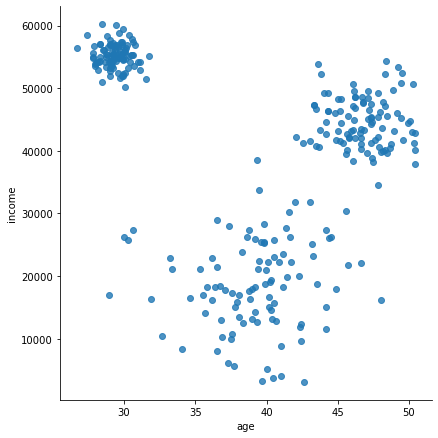

In [22]:
sns.lmplot("age","income",data = customer_df,fit_reg=False,size = 6)

## Normalise the data

Without Normalising, the clusters are mostly segmented based on income due to its high variation.
The scale of age is 0 to 60, while salary ranges from 0 to 50K. For example, the difference between the ages of 20 and 70 is significant but numerical difference is only 50. 
On the other side, salary difference between 1000 and 1100 is only 1000, but the numerical number is very high.

Hence we use Normalising technique which will help the numbers to get alligned.
It basically normalises all values by subtracting all values from its mean and then dividing it by standard deviation.

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(customer_df[['age','income']])
scaled_df[:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [13]:
from sklearn.cluster import KMeans
cluster = KMeans(3, random_state= 42)
cluster.fit(scaled_df)
customer_df['Cluster_id'] = cluster.labels_

In [15]:
customer_df.head(2)

,income,age,Cluster_id
0,41100.0,48.75,1
1,54100.0,28.10,0


C:\Users\Hiveminds\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hiveminds\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


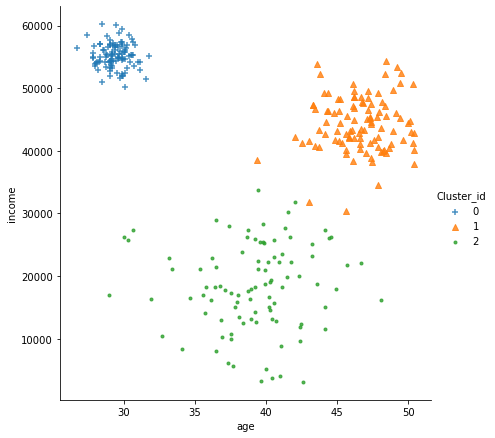

In [18]:
markers = ['+','^','.']
sns.lmplot('age','income',data=customer_df,fit_reg=False,hue = 'Cluster_id',markers = markers,size =6)

In [21]:
customer_df.groupby('Cluster_id')['age','income'].agg({'mean','std'}).reset_index()

<ipython-input-21-827c5d709200>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_df.groupby('Cluster_id')['age','income'].agg({'mean','std'}).reset_index()


Cluster_id        age                  income             
                   mean       std          mean          std
0          0  29.384000  0.921458  55204.000000  1951.943864
1          1  46.627184  2.151559  44308.737864  4390.321503
2          2  39.140206  3.558665  18321.649485  6924.747691

1. Cluster 0 - Custuomers with the age of 30 and Mean Income 55K. Low Age High Income
2. Cluster 1 - Customers with age of 46 and mean income of 44K. High age mid Income.
3. Cluster 2 - Customers with the age of 39 and mean Income of 18K. Mid age and low Income.